In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_qa = pd.read_csv('data/wine-qa.csv')
wine_qa.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,type,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,red,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,5,2.6,0.68,67.0,red,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,5,2.3,0.65,54.0,red,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,6,1.9,0.58,60.0,red,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,red,0.70


In [3]:
wine_qa.describe()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,0.056034,0.318633,0.994697,7.215307,30.525319,3.218501,5.818378,5.443235,0.531268,115.744574,0.339666
std,1.192712,0.035034,0.145318,0.002999,1.296434,17.749400,0.160787,0.873255,4.757804,0.148806,56.521855,0.164636
min,8.000000,0.009000,0.000000,0.987110,3.800000,1.000000,2.720000,3.000000,0.600000,0.220000,6.000000,0.080000
25%,9.500000,0.038000,0.250000,0.992340,6.400000,17.000000,3.110000,5.000000,1.800000,0.430000,77.000000,0.230000
50%,10.300000,0.047000,0.310000,0.994890,7.000000,29.000000,3.210000,6.000000,3.000000,0.510000,118.000000,0.290000
75%,11.300000,0.065000,0.390000,0.996990,7.700000,41.000000,3.320000,6.000000,8.100000,0.600000,156.000000,0.400000
max,14.900000,0.611000,1.660000,1.038980,15.900000,289.000000,4.010000,9.000000,65.800000,2.000000,440.000000,1.580000


In [4]:
y = wine_qa['quality']
X = wine_qa.drop(columns=['quality'])

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [6]:
label_encoder.fit(X['type'])

LabelEncoder()

In [7]:
color = label_encoder.transform(X['type'])
X = X.drop(columns=['type'])

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
prep = StandardScaler()
prep.fit(X)

StandardScaler()

In [9]:
X_trans = pd.DataFrame(prep.transform(X))
X_trans['type'] = color
X_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,type
0,-0.915464,0.569958,-2.192833,1.034993,0.142473,-1.100140,1.813090,-0.744778,0.193097,-1.446359,2.188833,0
1,-0.580068,1.197975,-2.192833,0.701486,0.451036,-0.311320,-0.115073,-0.597640,0.999579,-0.862469,3.282235,0
2,-0.580068,1.026697,-1.917553,0.768188,0.451036,-0.874763,0.258120,-0.660699,0.797958,-1.092486,2.553300,0
3,-0.580068,0.541412,1.661085,1.101694,3.073817,-0.762074,-0.363868,-0.744778,0.327510,-0.986324,-0.362438,0
4,-0.915464,0.569958,-2.192833,1.034993,0.142473,-1.100140,1.813090,-0.744778,0.193097,-1.446359,2.188833,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans,y)

In [11]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,type
1369,-0.076974,0.370134,-2.192833,-0.245672,-0.474652,-1.494550,0.693511,-0.807837,-1.083833,-1.906393,1.642132,0
342,-0.580068,1.768899,1.041706,1.168395,2.842395,-1.381861,0.506915,-0.765798,1.470026,-1.800231,0.305752,0
1688,-1.502407,-0.343521,2.074005,0.934941,-0.088949,1.209975,-0.612663,1.336174,-0.478971,0.641490,0.609474,1
2349,0.845365,-0.914446,0.559966,-0.632540,-0.011808,1.435352,-1.110254,0.453346,-1.419867,1.083831,-0.301694,1
5238,-0.412370,-1.114269,0.009406,-0.405755,-0.397511,0.083090,-0.612663,-0.366423,-0.613385,-0.296272,-1.273607,1


## MODEL

In [12]:
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(12,),kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='relu'))

In [13]:
model.output_shape

(None, 1)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 91        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L2',
     'config': {'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 7,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Glor

In [16]:
model.get_weights()

[array([[ 2.10520744e-01,  2.85707712e-01, -3.99877667e-01,
          1.81577206e-02, -3.23844552e-01,  3.12265873e-01,
         -4.65228200e-01, -6.82663918e-02,  1.93341851e-01,
          9.50884819e-02,  5.94103336e-03, -1.81459427e-01],
        [-1.08848691e-01,  1.66613698e-01,  2.43338346e-02,
          4.25999284e-01, -2.93905735e-01,  3.05199146e-01,
         -1.08429790e-01,  2.11684346e-01,  2.99996972e-01,
          2.27087498e-01, -3.42893600e-01,  5.75900078e-03],
        [-3.47257853e-02, -3.79054785e-01,  4.37046289e-02,
          1.48160100e-01,  3.47066164e-01,  3.23179603e-01,
          3.34020257e-01, -3.47297072e-01, -5.71887493e-02,
          3.46008420e-01,  2.58013248e-01,  3.76356840e-01],
        [-4.37344790e-01, -4.86390948e-01, -2.51067638e-01,
         -3.16718102e-01, -3.13313007e-01,  4.26860809e-01,
          4.31985378e-01, -1.49663925e-01,  3.96862030e-01,
          2.16537595e-01, -4.69577312e-03, -1.30688190e-01],
        [-2.68605232e-01, -2.8469133

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [18]:
wg, bs = model.layers[2].get_weights()

In [19]:
wg.shape # 1 weight per input per neuron

(7, 1)

In [20]:
wg[:1,:5]

array([[-0.43144575]], dtype=float32)

In [21]:
bs.shape # 1 bias per neuron

(1,)

In [22]:
bs[:5]

array([0.], dtype=float32)

## Compile and Fit

In [23]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,type
1369,-0.076974,0.370134,-2.192833,-0.245672,-0.474652,-1.494550,0.693511,-0.807837,-1.083833,-1.906393,1.642132,0
342,-0.580068,1.768899,1.041706,1.168395,2.842395,-1.381861,0.506915,-0.765798,1.470026,-1.800231,0.305752,0
1688,-1.502407,-0.343521,2.074005,0.934941,-0.088949,1.209975,-0.612663,1.336174,-0.478971,0.641490,0.609474,1
2349,0.845365,-0.914446,0.559966,-0.632540,-0.011808,1.435352,-1.110254,0.453346,-1.419867,1.083831,-0.301694,1
5238,-0.412370,-1.114269,0.009406,-0.405755,-0.397511,0.083090,-0.612663,-0.366423,-0.613385,-0.296272,-1.273607,1


In [24]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,type
count,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000
mean,0.003266,0.002244,-0.010017,0.004833,0.001373,-0.020659,0.009337,0.000820,0.004912,-0.016029,0.007147,0.749795
std,0.998592,1.015484,0.998050,0.984149,1.005451,0.979858,1.005730,0.990776,1.006323,1.000881,1.008327,0.433176
min,-2.089350,-1.257000,-2.192833,-2.530192,-2.557448,-1.663583,-2.976217,-1.018034,-2.091935,-1.941780,-1.577330,0.000000
25%,-0.831615,-0.514799,-0.541153,-0.782618,-0.628933,-0.762074,-0.674862,-0.765798,-0.680592,-0.703226,-0.666161,0.000000
50%,-0.160823,-0.257883,-0.059414,0.067824,-0.166089,-0.142287,-0.052874,-0.513561,-0.142937,0.022213,-0.301694,1.000000
75%,0.677667,0.255949,0.491146,0.742341,0.373895,0.590188,0.631312,0.558444,0.461924,0.694571,0.427241,1.000000
max,3.696231,15.842187,9.231281,5.203824,6.699425,6.534509,4.923029,5.498078,9.870879,4.038668,6.015740,1.000000


In [25]:
model.compile(loss= 'mse',
              optimizer= 'adam',
              metrics=['mae'])

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=128, verbose=2)

Epoch 1/200
39/39 - 0s - loss: 26.3196 - mae: 4.9872 - val_loss: 22.0174 - val_mae: 4.4753
Epoch 2/200
39/39 - 0s - loss: 18.0603 - mae: 3.9687 - val_loss: 13.7975 - val_mae: 3.3544
Epoch 3/200
39/39 - 0s - loss: 10.5973 - mae: 2.8565 - val_loss: 7.6586 - val_mae: 2.3446
Epoch 4/200
39/39 - 0s - loss: 5.5850 - mae: 1.9363 - val_loss: 4.2208 - val_mae: 1.6154
Epoch 5/200
39/39 - 0s - loss: 3.1563 - mae: 1.3599 - val_loss: 2.9159 - val_mae: 1.2806
Epoch 6/200
39/39 - 0s - loss: 2.3512 - mae: 1.1512 - val_loss: 2.4729 - val_mae: 1.1688
Epoch 7/200
39/39 - 0s - loss: 2.0215 - mae: 1.0704 - val_loss: 2.2359 - val_mae: 1.1120
Epoch 8/200
39/39 - 0s - loss: 1.8334 - mae: 1.0187 - val_loss: 2.0689 - val_mae: 1.0639
Epoch 9/200
39/39 - 0s - loss: 1.6968 - mae: 0.9785 - val_loss: 1.9386 - val_mae: 1.0281
Epoch 10/200
39/39 - 0s - loss: 1.5876 - mae: 0.9463 - val_loss: 1.8235 - val_mae: 0.9959
Epoch 11/200
39/39 - 0s - loss: 1.4937 - mae: 0.9152 - val_loss: 1.7231 - val_mae: 0.9641
Epoch 12/200
3

39/39 - 0s - loss: 0.5276 - mae: 0.5400 - val_loss: 0.5744 - val_mae: 0.5545
Epoch 93/200
39/39 - 0s - loss: 0.5289 - mae: 0.5398 - val_loss: 0.5720 - val_mae: 0.5517
Epoch 94/200
39/39 - 0s - loss: 0.5266 - mae: 0.5394 - val_loss: 0.5706 - val_mae: 0.5509
Epoch 95/200
39/39 - 0s - loss: 0.5241 - mae: 0.5378 - val_loss: 0.5688 - val_mae: 0.5495
Epoch 96/200
39/39 - 0s - loss: 0.5241 - mae: 0.5384 - val_loss: 0.5720 - val_mae: 0.5547
Epoch 97/200
39/39 - 0s - loss: 0.5220 - mae: 0.5380 - val_loss: 0.5671 - val_mae: 0.5509
Epoch 98/200
39/39 - 0s - loss: 0.5195 - mae: 0.5364 - val_loss: 0.5694 - val_mae: 0.5499
Epoch 99/200
39/39 - 0s - loss: 0.5198 - mae: 0.5366 - val_loss: 0.5632 - val_mae: 0.5477
Epoch 100/200
39/39 - 0s - loss: 0.5179 - mae: 0.5363 - val_loss: 0.5671 - val_mae: 0.5507
Epoch 101/200
39/39 - 0s - loss: 0.5183 - mae: 0.5359 - val_loss: 0.5632 - val_mae: 0.5501
Epoch 102/200
39/39 - 0s - loss: 0.5172 - mae: 0.5356 - val_loss: 0.5641 - val_mae: 0.5517
Epoch 103/200
39/39 

Epoch 183/200
39/39 - 0s - loss: 0.4781 - mae: 0.5258 - val_loss: 0.5227 - val_mae: 0.5439
Epoch 184/200
39/39 - 0s - loss: 0.4777 - mae: 0.5269 - val_loss: 0.5253 - val_mae: 0.5474
Epoch 185/200
39/39 - 0s - loss: 0.4807 - mae: 0.5283 - val_loss: 0.5208 - val_mae: 0.5454
Epoch 186/200
39/39 - 0s - loss: 0.4786 - mae: 0.5266 - val_loss: 0.5198 - val_mae: 0.5418
Epoch 187/200
39/39 - 0s - loss: 0.4790 - mae: 0.5279 - val_loss: 0.5178 - val_mae: 0.5429
Epoch 188/200
39/39 - 0s - loss: 0.4781 - mae: 0.5269 - val_loss: 0.5179 - val_mae: 0.5430
Epoch 189/200
39/39 - 0s - loss: 0.4787 - mae: 0.5273 - val_loss: 0.5222 - val_mae: 0.5448
Epoch 190/200
39/39 - 0s - loss: 0.4795 - mae: 0.5282 - val_loss: 0.5177 - val_mae: 0.5426
Epoch 191/200
39/39 - 0s - loss: 0.4800 - mae: 0.5290 - val_loss: 0.5263 - val_mae: 0.5489
Epoch 192/200
39/39 - 0s - loss: 0.4777 - mae: 0.5282 - val_loss: 0.5171 - val_mae: 0.5426
Epoch 193/200
39/39 - 0s - loss: 0.4771 - mae: 0.5271 - val_loss: 0.5176 - val_mae: 0.5423

In [28]:
model.fit(X_trans, y)

204/204 [==============================] - 0s 904us/step - loss: 0.5034 - mae: 0.5410


In [29]:
score = model.evaluate(X_test,y_test,batch_size=42,verbose=2)
score

39/39 - 0s - loss: 0.5118 - mae: 0.5394


[0.5117650032043457, 0.5393674969673157]

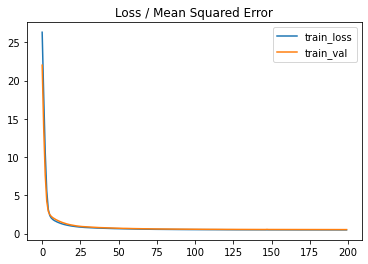

In [30]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='train_val')
pyplot.legend()
pyplot.show()

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred.round()

array([[7.],
       [7.],
       [6.],
       ...,
       [6.],
       [6.],
       [6.]], dtype=float32)

In [33]:
y_test

481     8
4199    7
1073    6
2608    6
543     6
       ..
2384    6
3567    6
957     6
6123    6
1855    7
Name: quality, Length: 1625, dtype: int64

In [34]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [35]:
explained_variance_score(y_test,y_pred.round())

0.2765281121953278

In [36]:
mean_squared_error(y_test,y_pred.round())

0.5723076923076923

In [37]:
r2_score(y_test,y_pred.round())

0.2745619290100344

In [38]:
df_score_nn =  pd.DataFrame()

In [39]:
df_score_nn['error'] = ('mse', 'r2') 

In [40]:
df_score_nn['Full_NN'] = (0.57,0.28) 
df_score_nn['NN_redwine'] = (0.60,0.13) 
df_score_nn['NN_whitewine'] = (0.75,0.09) 

In [41]:
df_score_nn

,error,Full_NN,NN_redwine,NN_whitewine
0,mse,0.56,0.60,0.75
1,r2,0.28,0.13,0.09
